# Using XGBoost

# Load and Explore the Dataset

## Explore and understand your dataset by:

### --> Displaying basic information, sample rows, and statistics.

### --> Identifying missing values.

### --> Visualizing the target variable (Fraud History).

### --> Exploring distributions of key numerical features.

### --> Generating a correlation heatmap for numeric columns.

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Provider ID               10000 non-null  object 
 1   Procedure codes/CPT Code  10000 non-null  int64  
 2   Billing frequency         10000 non-null  object 
 3   Patient ID                10000 non-null  object 
 4   Total amount              10000 non-null  float64
 5   Doctor Name               10000 non-null  object 
 6   Doctor Specialization     10000 non-null  object 
 7   Hospital Name             10000 non-null  object 
 8   Room Category             10000 non-null  object 
 9   Hospitalization Reason    10000 non-null  object 
 10  Date of Admission         10000 non-null  object 
 11  Date of Discharge         10000 non-null  object 
 12  Insurance Company Name    10000 non-null  object 
 13  Fraud History             10000 non-null

/var/folders/2c/h9d7v7vx5215nl8jj0vpk8dc0000gn/T/ipykernel_85736/1244336612.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud History', data=df, palette='Set2')


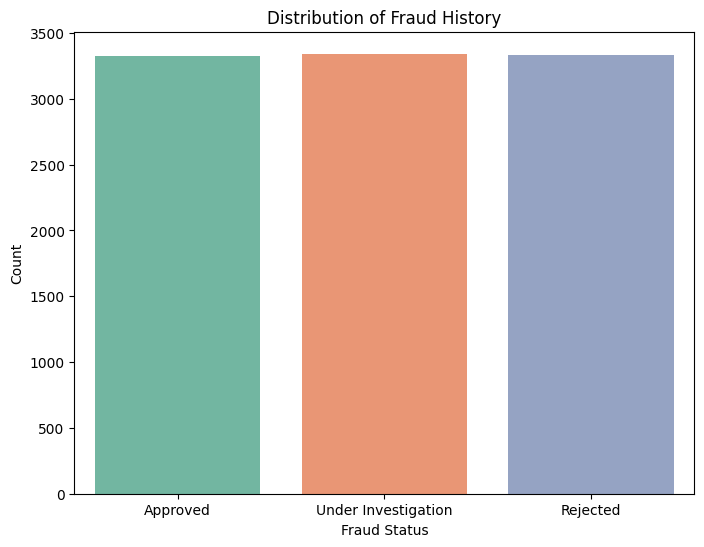

In [1]:
# Step 1: Load and Explore the Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import xgboost as xgb

# Load the dataset
file_path = 'health_insurance_fraud_large_dataset_v1.csv'
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Information:\n")
print(df.info())

# Display sample rows
print("\nSample Rows:\n")
print(df.head())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Step 2: Visualize the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Fraud History', data=df, palette='Set2')
plt.title('Distribution of Fraud History')
plt.xlabel('Fraud Status')
plt.ylabel('Count')
plt.show()



# Data Preprocessing

## Data Preprocessing steps, including:

### ---> Handling missing values.

### ---> Converting dates to datetime and calculating the length of stay.

### ---> Encoding categorical variables.

### ---> Scaling numerical features.

### ---> Displaying the preprocessed data.

In [2]:
# Step 3: Data Preprocessing

# 1. Handle Missing Values
df.dropna(inplace=True)

# 2. Convert Dates to Datetime Format
date_cols = ['Date of Admission', 'Date of Discharge', 'Start Date', 'End Date', 'Hospitalized Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Create a new feature for the length of stay
df['Length of Stay'] = (df['Date of Discharge'] - df['Date of Admission']).dt.days

# Drop original datetime columns
df.drop(date_cols, axis=1, inplace=True)

# 3. Encode Categorical Variables
label_encoder = LabelEncoder()
df['Fraud History'] = label_encoder.fit_transform(df['Fraud History'])

# Automatically encode all object (categorical) columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

# 4. Scale Numerical Features
scaler = StandardScaler()
numeric_cols = ['Total amount', 'Claim Limits', 'Premium Amount', 'Treatment Expenses', 'Length of Stay']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])



/var/folders/2c/h9d7v7vx5215nl8jj0vpk8dc0000gn/T/ipykernel_85736/513757310.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/2c/h9d7v7vx5215nl8jj0vpk8dc0000gn/T/ipykernel_85736/513757310.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/2c/h9d7v7vx5215nl8jj0vpk8dc0000gn/T/ipykernel_85736/513757310.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/2c/h9d7v7vx5215nl8jj0vpk8dc0000gn

# Model Building

## --> Split Data: Train-test split (e.g., 70% train, 30% test).

## --> Model Selection: Use a combination of models for comparison:

## --> XGBoost (High performance on tabular data)

## --> Hyperparameter Tuning: Use GridSearchCV or RandomizedSearch for best parameters.


Model Evaluation:

Accuracy: 0.3303333333333333
[[347 279 326]
 [391 286 383]
 [344 286 358]]
              precision    recall  f1-score   support

           0       0.32      0.36      0.34       952
           1       0.34      0.27      0.30      1060
           2       0.34      0.36      0.35       988

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.33      0.33      0.33      3000



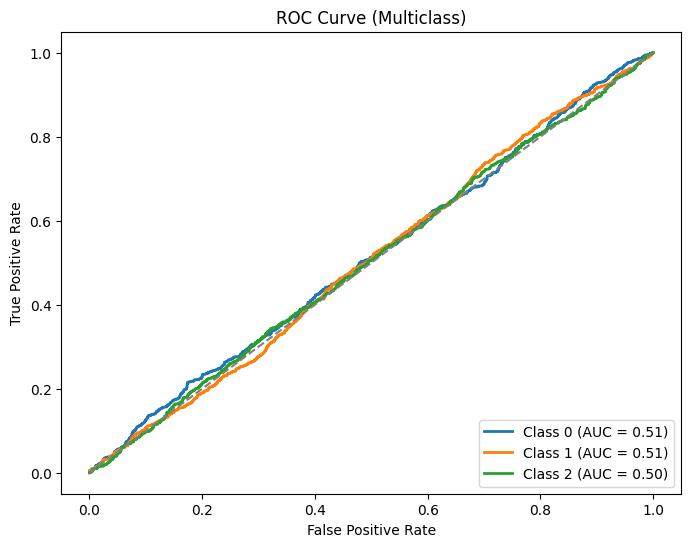

In [3]:
# Step 4: Model Building

# 1. Define Features and Target
X = df.drop(['Fraud History', 'Provider ID', 'Patient ID', 'Doctor Name', 'Hospital Name', 'Policy Number'], axis=1)
y = df['Fraud History']

# 2. Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize and Train the XGBoost Model
model = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = model.predict(X_test)

# Step 5: Model Evaluation

# 1. Accuracy
print("\nModel Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))

# 2. Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 3. ROC Curve and AUC (for binary/multiclass classification)
y_prob = model.predict_proba(X_test)
y_test_binarized = label_binarize(y_test, classes=range(y_prob.shape[1]))

plt.figure(figsize=(8, 6))
for i in range(y_prob.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()
